# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['mairena del alcor', 'bethel', 'ereymentau', 'lebu', 'lagoa', 'rikitea', 'khatanga', 'vardo', 'punta arenas', 'illoqqortoormiut', 'ndele', 'machico', 'ancud', 'tasiilaq', 'ushuaia', 'najran', 'susuman', 'kodiak', 'albany', 'fairbanks', 'bredasdorp', 'pinawa', 'belushya guba', 'ponta do sol', 'lasa', 'butaritari', 'mataura', 'kawalu', 'sorland', 'poltavka', 'port alfred', 'jishou', 'tuktoyaktuk', 'torbay', 'karratha', 'busselton', 'nattam', 'cape town', 'scottsbluff', 'namibe', 'ribeira grande', 'castro', 'kununurra', 'new norfolk', 'praxedis guerrero', 'katima mulilo', 'thinadhoo', 'bluff', 'port lincoln', 'grand gaube', 'hervey bay', 'geraldton', 'souillac', 'ucluelet', 'guerrero negro', 'kirakira', 'formoso do araguaia', 'luderitz', 'burnie', 'vanimo', 'hasaki', 'pangnirtung', 'atuona', 'taolanaro', 'codrington', 'plaster rock', 'gladstone', 'barrow', 'kudahuvadhoo', 'yellowknife', 'richards bay', 'carnarvon', 'hermanus', 'dikson', 'batavia', 'chokurdakh', 'moussoro', 'urucui', 'hit

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = url + "&q=" + urllib.request.pathname2url(city)
    record_count += 1
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found....")
        pass
              
print("-----------------------------")
print("Retrieval Complete      ")

Beginning Data Retrieval     
-----------------------------
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not found....
City not 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
city_data_pd = pd.DataFrame(city_data)

lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

city_data_pd.count()
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mairena del alcor,20,ES,1573673984,59,37.37,-5.75,66.00,9.17
1,bethel,40,US,1573673823,72,60.79,-161.76,15.80,23.04
2,ereymentau,100,KZ,1573673984,81,51.62,73.10,20.89,6.33
3,lebu,75,ET,1573673883,59,8.96,38.73,60.80,11.41
4,lagoa,0,PT,1573673823,72,37.14,-8.45,63.00,6.93


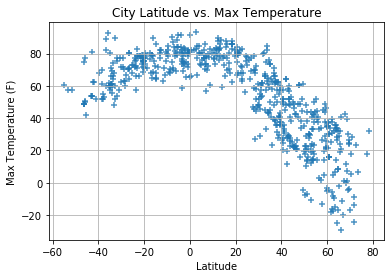

In [21]:
plt.scatter(lats, 
            max_temps,
            edgecolor="blue", linewidths=1, marker="+", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)



plt.show()

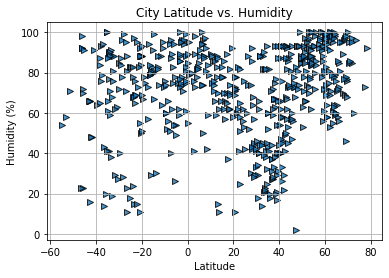

In [20]:
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker=">", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#### Latitude vs. Cloudiness Plot

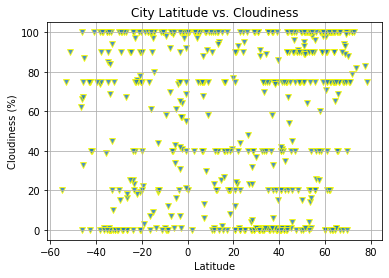

In [19]:
plt.scatter(lats, 
            cloudiness,
            edgecolor="yellow", linewidths=1, marker="v", 
            alpha=0.8, label="Cities")
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#### Latitude vs. Wind Speed Plot

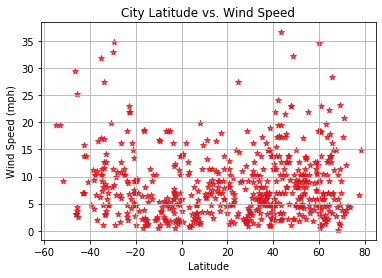

In [18]:
plt.scatter(lats, 
            wind_speed,
            edgecolor="red", linewidths=1, marker="*", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()